<a href="https://colab.research.google.com/github/arashdeep3/cap-comp215/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COMP 215 - PROJECT 1 (SIR - Epidemiological Model)**

# Name : Arashdeep Singh
# Date: 26 February 2024


WHAT IS SIR MODEL? :-
The SIR (Susceptible-Infected-Recovered) model is a simple, predictive “Compartment Model” for infectious diseases that are transmitted from human to human, and where recovery confers lasting resistance, such as measles, mumps and rubella.The SIR (Susceptible-Infected-Recovered) model is a simple, predictive “Compartment Model” for infectious diseases that are transmitted from human to human, and where recovery confers lasting resistance, such as measles, mumps and rubella. https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_mode

### **PROBLEMSTATEMENT AND EXPERIMENTING WITH SIR MODEL:-**

We use a WS Graph to model people (nodes) and social connections (edges). NetworkX has a built-in to create graphs that make good models for this case:

**G = nx.watts_strogatz_graph(n=NUM_INDIVIDUALS, k=AVERAGE_NUMBER_OF_CONNECTIONS, p=0.5)**

Each individual in the graph can be in one of three states: Susceptible, Infectious, or Recovered (SIR model). The simulation begins with all individuals in the Susceptible state, except for one in the Infectious state. In each simulation step, neighboring Susceptible individuals may become Infectious with a certain probability, p. The SIR model is designed to be configurable, allowing for adjustable initial states and parameters controlling transmission and recovery rates. The model can be either deterministic or stochastic, maintaining simplicity.

To analyze the impact of policies like mass vaccination on infection spread, we design an experiment. The Watts-Strogatz graph serves as the social network, and the SIR model is employed with customizable parameters. The experiment incorporates policies such as mass vaccination, where a specified percentage of individuals are vaccinated initially. The simulation visualizes the spread of infection over time through animation and presents a chart illustrating the number of infected individuals at each simulation step.

This experiment aims to provide insights into the effectiveness of policies in mitigating infection spread, offering a dynamic visualization and quantitative analysis of the simulation results.

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from tabulate import tabulate
import timeit



Next step is to introduce a class method that works as a simulation step. Make another dictionary (copy of the first one) and modify the susceptible, infected or recovered entries in the dictionary according to the probabilities given for the infection or recovery. And then simulate all the steps for the desired number of steps and call the method for the same

Display the results using a graph and return the count of **Susceptible** , **Infected** , and **Recovered** individuals updated in our dictionary.

In [42]:
# used openai.com to know how to  draw table for make data more effective

class SIR_Model:
    """Initialize all the required variables for the SIR model."""
    def __init__(self, population_size, avg_connections, infection_probability, recovery_probability):
        # population_size: Number of individuals sampled for experimenting
        self.population_size = population_size

        # avg_connections: Average number of connections that can be plotted for the graph
        self.avg_connections = avg_connections

        # infection_probability: Probability of the infection spread by the disease
        self.infection_probability = infection_probability

        # recovery_probability: Probability of the person to recover from the disease
        self.recovery_probability = recovery_probability

        # Create a Watts-Strogatz graph to represent connections between individuals
        self.graph = nx.watts_strogatz_graph(n=population_size, k=avg_connections, p=0.5)

        # Initialize the states of individuals
        self.initial_states = {node: 'S' for node in self.graph.nodes()}
        random_infected_node = random.choice(list(self.graph.nodes()))
        self.initial_states[random_infected_node] = 'I'

    def simulation(self):
        # Create a list of infected nodes
        infected_nodes = [node for node, state in self.initial_states.items() if state == 'I']

        # For each infected node, infect its neighbors with probability `infection_probability`
        for node in infected_nodes:
            for neighbor in self.graph.neighbors(node):
                if self.initial_states[neighbor] == 'S' and random.random() < self.infection_probability:
                    self.initial_states[neighbor] = 'I'

        # For each infected node, recover with probability `recovery_probability`
        for node in infected_nodes:
            if random.random() < self.recovery_probability:
                self.initial_states[node] = 'R'

    def simulate(self, steps):
        for n in range(steps):
            self.simulation()

    def plot_data(self):
        node_colors = {'S': 'lightblue', 'I': 'tomato', 'R': 'lightgreen'}
        colors = [node_colors[state] for state in self.initial_states.values()]
        nx.draw(self.graph, with_labels=True, node_color=colors)
        plt.show()

    def numerical_data(self):
        num_susceptible = sum(state == 'S' for state in self.initial_states.values())
        num_infected = sum(state == 'I' for state in self.initial_states.values())
        num_recovered = sum(state == 'R' for state in self.initial_states.values())
        table_data = [["Susceptible population", num_susceptible],
              ["Infected population", num_infected],
              ["Recovered population", num_recovered]]
        print(tabulate(table_data, headers=["Category", "Count"], tablefmt="grid"))


# **Experiment**

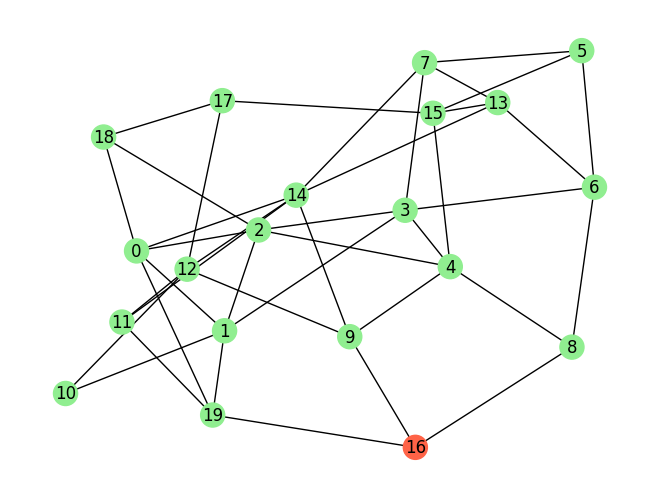

+------------------------+---------+
| Category               |   Count |
+========================+=========+
| Susceptible population |       0 |
+------------------------+---------+
| Infected population    |       1 |
+------------------------+---------+
| Recovered population   |      19 |
+------------------------+---------+


In [43]:
# Set parameters
population_size = 20
average_connections = 5
infection_probability = 0.4
recovery_probability = 0.1
steps = 30

# Create and simulate the SIR model
sir_model = SIR_Model(population_size, average_connections, infection_probability, recovery_probability)
sir_model.simulate(steps)
sir_model.plot_data()

# print the simulation results in table form
sir_model.numerical_data()


# **Big-o notation**
The time complexity of your SIR model implementation is dominated by the simulation process, and it can be expressed as O(steps * n * avg_connections), where:

steps is the number of simulation steps,

n is the population size (number of nodes in the graph),

avg_connections is the average number of connections per node in the Watts-Strogatz graph.

The initialization of the Watts-Strogatz graph contributes O(n log n) to the overall complexity. In summary, your SIR model's efficiency is influenced by the number of simulation steps and the average connections in the graph. It's crucial to consider these factors for performance optimization as the input size increases.

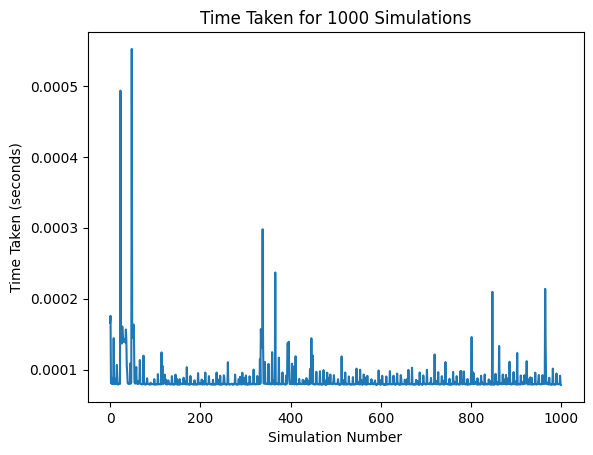

In [45]:
avg_time_taken = []
for i in range(1000):
  time_taken = timeit.timeit(lambda:sir_model.simulate(steps), number=3)
  avg_time_taken.append(time_taken)


plt.plot(avg_time_taken)
plt.xlabel('Simulation Number')
plt.ylabel('Time Taken (seconds)')
plt.title('Time Taken for 1000 Simulations')
plt.show()